

# Project: Investigate a Dataset - [TMDb_Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including 21 columns such as :id, imdb_id, revenue, budget, popularity ...etc


### Question(s) for Analysis

1- ? Which movies have the highest and lowest revenue

2- ? Who are the actors who have the most appearances in films

3- ? which genres have the most appearances in films

4- ? Which movies have the highest and lowest budget

5- ? Do old movies have more popular than new movies



 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [2]:

#reading csv file with variable name :movies_data

movies_data = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

#showing first five rows 

movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Displaying number of rows and columns
movies_data.shape

(10866, 21)

In [4]:
# Displaying some information about data
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning

> **First**:Removing unused columns such as id, imdb_id, production_company ..etc.

> **Second**:Removing the duplicacy in the rows.

> **Third**:Removing NAN values from columns

> **Fourth**:Changing release date column into date format.

> **Fifth**:Removing movies that have zero budget and zero revenue


### First:Removing unused column

In [5]:

# creating list variable that contains columns need to remove 
del_col=[ 'id', 'imdb_id', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count']

# removing columns
movies_data= movies_data.drop(del_col,axis=1)

# viewing dataset after removing unused columns
movies_data.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


### Second:Removing the duplicacy in the rows.


In [6]:
# check if there is a diuplicated rows
movies_data.duplicated().sum()

1

In [7]:
#Removing Duplicates
movies_data.drop_duplicates(inplace=True)

### Third:Removing NAN values from columns

In [8]:
#Removing rows that have NAN values by dropna function 
movies_data.dropna(inplace=True)

#Display nomber of rows after romev nan vlues
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8001 entries, 0 to 10865
Data columns (total 14 columns):
popularity        8001 non-null float64
budget            8001 non-null int64
revenue           8001 non-null int64
original_title    8001 non-null object
cast              8001 non-null object
director          8001 non-null object
tagline           8001 non-null object
runtime           8001 non-null int64
genres            8001 non-null object
release_date      8001 non-null object
vote_average      8001 non-null float64
release_year      8001 non-null int64
budget_adj        8001 non-null float64
revenue_adj       8001 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 937.6+ KB


### Fourth:Changing release date column into date format.

In [9]:

movies_data['release_date']=pd.to_datetime(movies_data['release_date'])

movies_data.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09


### Fifth:Removing movies that have zero budget and zero revenue

In [10]:
# creating variable contains budget and revenue columns
temp=['budget', 'revenue']

# replacing zeros with NAN values
movies_data[temp]=movies_data[temp].replace(0,np.NAN)

# then deleting NAN values from columns
movies_data.dropna(subset = temp, inplace = True)

# display the new data set
movies_data.shape

(3572, 14)

<a id='eda'></a>
## Exploratory Data Analysis




### ? Which movies have the highest and lowest revenue 

In [15]:
#creating a function to calculate highest and lowest revenue
def highest_and_lowest(col):
    
    #create variable that contain min value of column
    low_rev=movies_data[col].min()
    #create variable that contain max value of column
    high_rev=movies_data[col].max()
    
    #selecting row that contain min value
    low_mov=movies_data.query('{}=={}'.format(col,low_rev))
    #selecting row that contain max value
    high_mov=movies_data.query('{}=={}'.format(col,high_rev))
    #selecting movie title's from row
    low_mov=low_mov.original_title.iloc[0]
    high_mov=high_mov.original_title.iloc[0]
    
    print('movie that has the highest {} : {} , the lowest {} : {}'.format(col,low_mov,col,high_mov))


In [16]:
# implementing the function
highest_and_lowest('revenue')

movie that has the highest revenue : Mallrats , the lowest revenue : Avatar


### ? Who are the actors who have the most appearances in films

In [17]:
#creating to count no.aappearances
def count(col):
    
    
#Separating multiple values at cast column
    df = movies_data[col].str.cat(sep = '|')
    
#giving pandas series and storing the values separately
    df = pd.Series(df.split('|'))
    
#arranging in descending order
    count = df.value_counts(ascending = False)

# return values have the most appearances
    return count


In [18]:
count('cast')

Robert De Niro       50
Bruce Willis         44
Samuel L. Jackson    43
Nicolas Cage         41
Matt Damon           35
                     ..
Holly Marie Combs     1
Peter Ostrum          1
Alexander Ludwig      1
Tatum O'Neal          1
Maxwell Caulfield     1
Length: 6342, dtype: int64

then From the previous cell we Conclude that Robert De Niro seems to be the most frequent and prevalent cast 

### ? which genres have the most appearances in films

In [19]:
count('genres')

Drama              1572
Comedy             1255
Thriller           1149
Action             1046
Adventure           720
Crime               614
Romance             595
Science Fiction     505
Horror              454
Family              405
Fantasy             381
Mystery             328
Animation           190
Music               117
History             112
War                 109
Western              49
Documentary          26
Foreign               8
TV Movie              1
dtype: int64

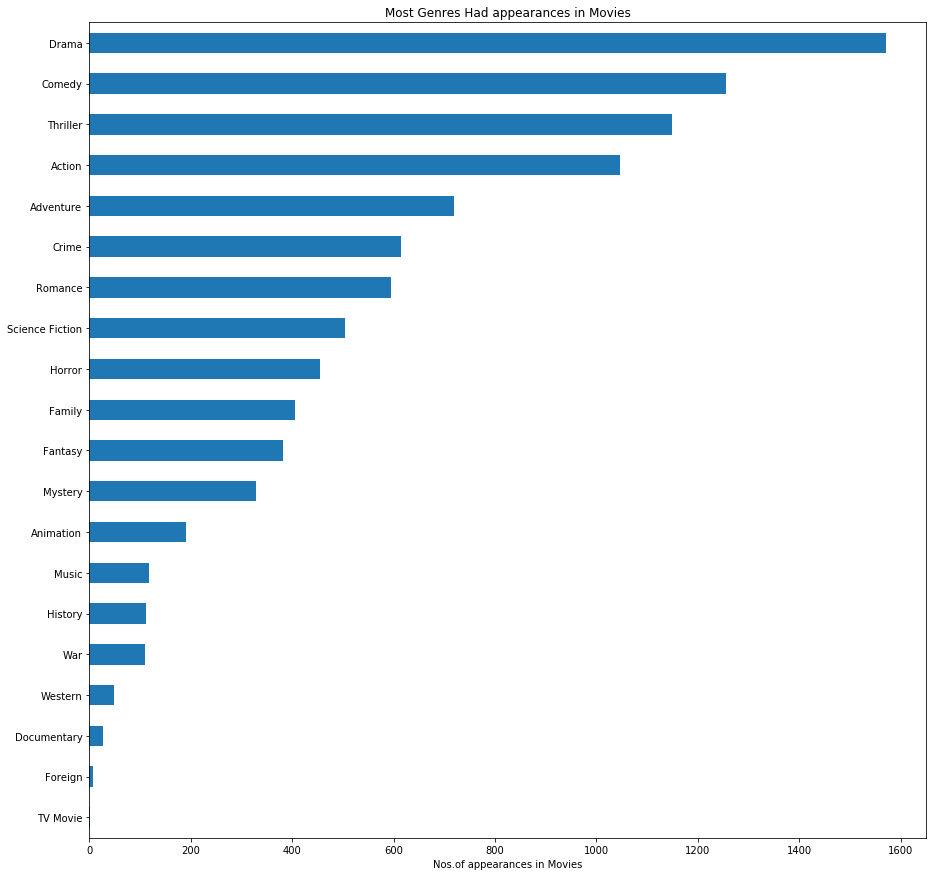

In [20]:
#lets plot the points in descending order top to bottom as we have data in same format.
x=count('genres')

x.sort_values(ascending = True, inplace = True)

#ploting
pl = x.plot.barh()

#title
pl.set(title = 'Most Genres Had appearances in Movies')

# on x axis
pl.set_xlabel('Nos.of appearances in Movies')

#figure size(width, height)
pl.figure.set_size_inches(15, 15)

#ploting the graph
plt.show()

From the graph we Conclude that Drama seems to be the most frequent and prevalent genre in movies and Thriller, Comedy and Action movies show a similar pattern.

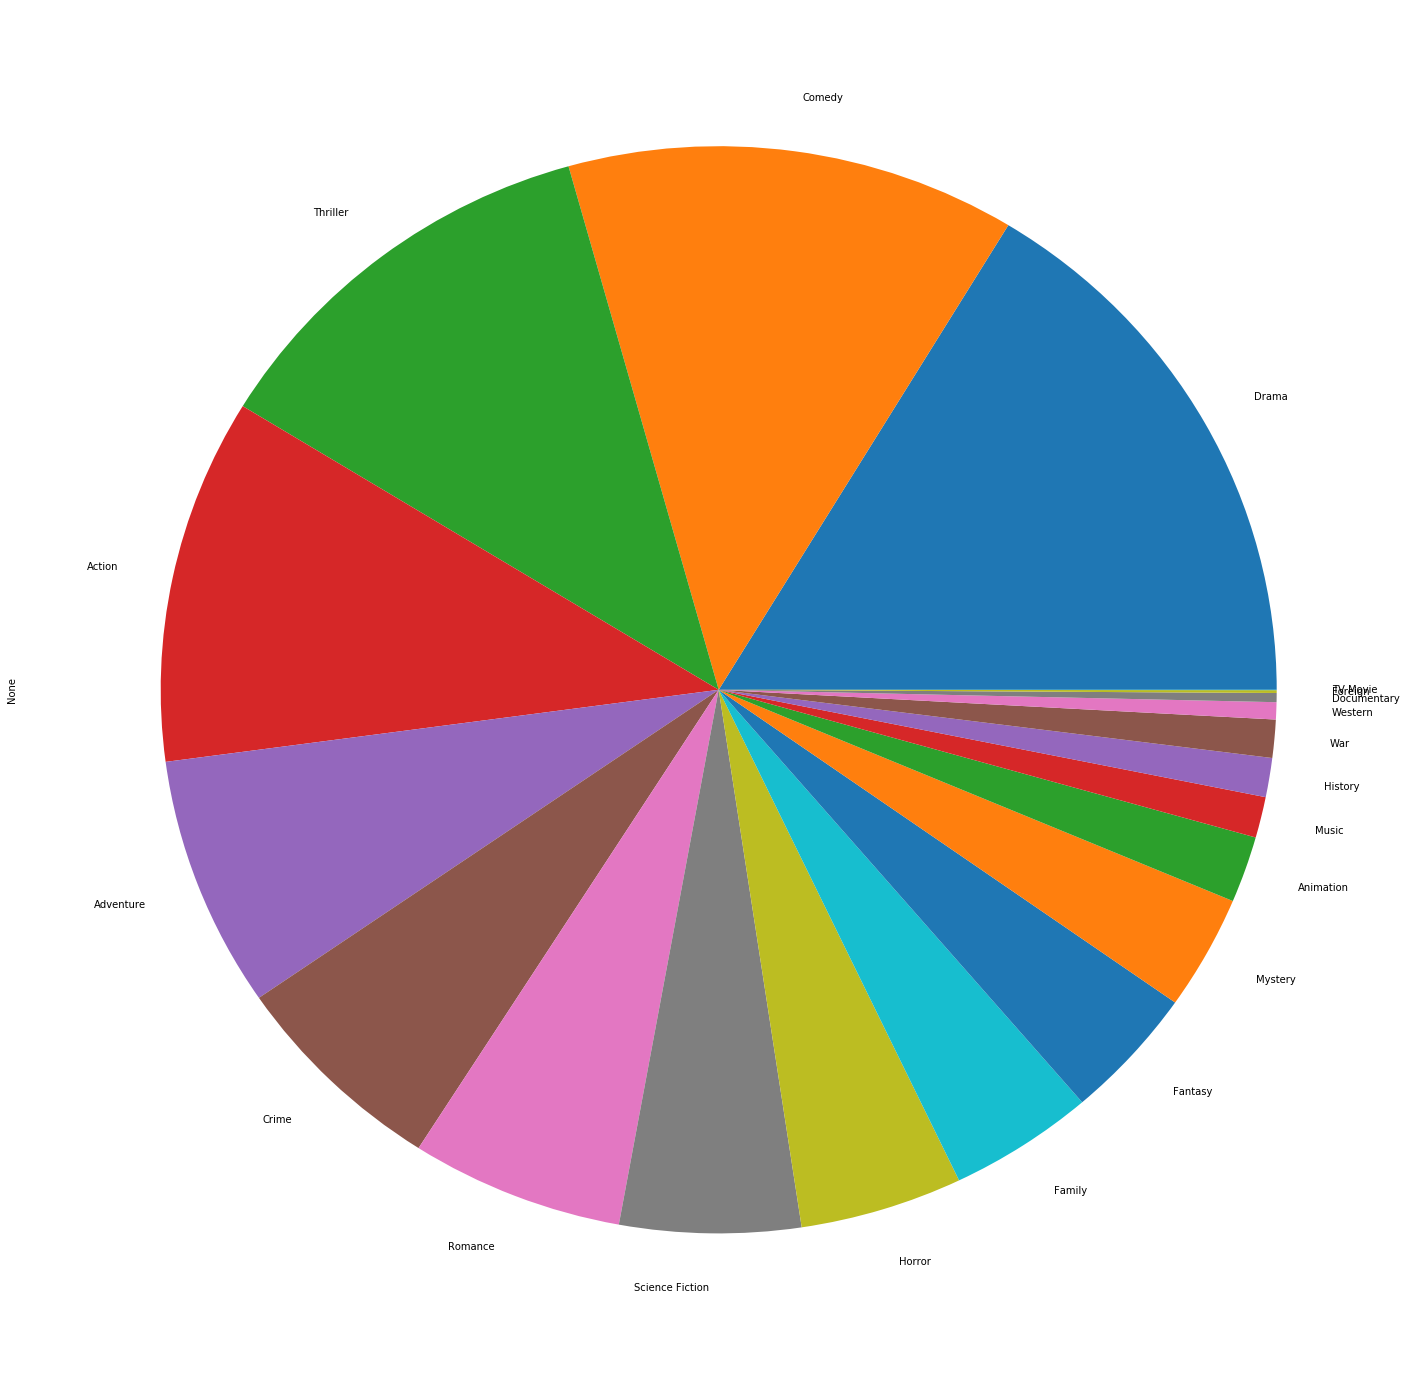

In [21]:
count('genres').plot(kind='pie', figsize= (25,25));

A differenet shape of the previous graph

### ? Which movies have the highest and lowest budget

In [23]:
#calling a function that calculate highest and lowest revenue
highest_and_lowest('budget')

movie that has the highest budget : Lost & Found , the lowest budget : The Warrior's Way


### ? Do old movies have more popular than new movies

In [24]:
#creating a variable that contains median from release year column
median = movies_data['release_year'].median()

#selecting the new movies
new_mov = movies_data.query('release_year>={}'.format(median))
#selecting the old movies
old_mov = movies_data.query('release_year<{}'.format(median))
# calculate popularity mean for new movies
new_pop = new_mov.popularity.mean()
# calculate popularity mean for old movies
old_pop = old_mov.popularity.mean()

if new_pop > old_pop:
    print('New movies have the most popular')
else :    print('old movies have the most popular')


New movies have the most popular


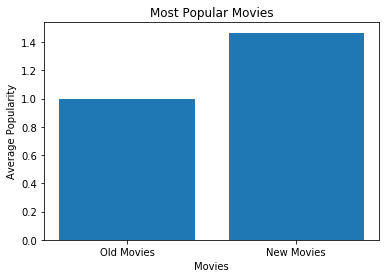

In [25]:
locations = [1, 2]
heights = [old_pop, new_pop]
labels = ['Old Movies', 'New Movies']
plt.bar(locations, heights, tick_label=labels)
plt.title('Most Popular Movies')
plt.xlabel('Movies')
plt.ylabel('Average Popularity');

From the graph we Conclude that New Movies seems to be the most popularity and favourite to people

<a id='conclusions'></a>
## Conclusions
Iam really happy to be part in analysis this data and i discovered some interesting facts about movies ,now we can conclude the following:


To Make a Movie popular and successful 
it should be:

Gener be : Drama , Comedy ,Thriller , Action
Any one of these should be in the cast :Robert De Niro,Bruce Willis , Samuel L. Jackson , Nicolas Cage , Matt Damon 


Some limitations :the dataset includes null and zero values and duplicated row in some featuresthe rows and Dropping the rows with missing values also affected the overall analysis.I think data cleaning is a necessary part before moving on to the dataset's investigation. 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])